# 1. Use RK4 to solve the damped and forced harmonic oscillator satisfying 2y"+ 0.2y'+ 2y = 2cos(1.2t), where y(0) = 2, y'(0) = −1

In [1]:
import math
import Library.assign6 as a
import matplotlib.pyplot as plt
 

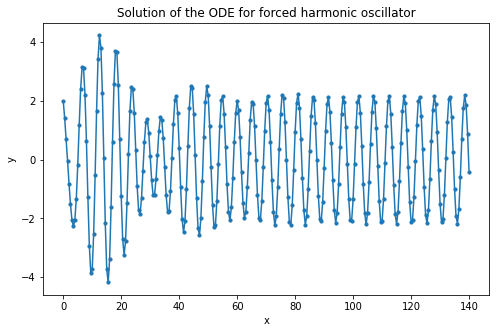

In [2]:
# For forced harmonic oscillator
# definig the double derivative of y with respect to x
def ddy(x, y, z):
    return (2*math.cos(1.2*x) - 2*y - 0.2*z)/2
# definig the single derivative of y with respect to x
def dy(x, y, z):
    return z
# solution
x, y = a.rk_4(ddy, dy, 0, 2, -1, 140, 0.5)
# plotting the solution of the ODE
plt.figure(figsize=(8,5))
plt.scatter(x,y, s=10)
plt.plot(x,y)
plt.title("Solution of the ODE for forced harmonic oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

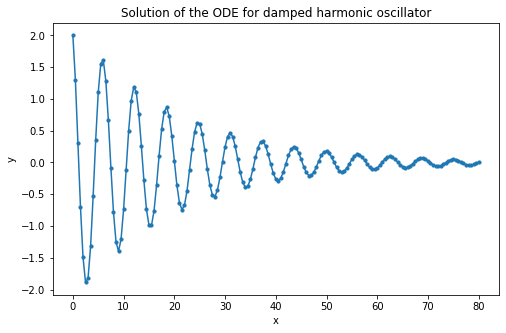

In [3]:
#For damped harmonic oscillator
# definig the double derivative of y with respect to x
def ddy(x, y, z):
    return (- 2*y - 0.2*z)/2
# definig the single derivative of y with respect to x
def dy(x, y, z):
    return z
# solution
x, y = a.rk_4(ddy, dy, 0, 2, -1, 80, 0.5)
# plotting the solution of the ODE
plt.figure(figsize=(8,5))
plt.scatter(x,y,s=10)
plt.plot(x,y)
plt.title("Solution of the ODE for damped harmonic oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 4. Find the dominant eigenvalue and its corresponding normalized eigenvector of a given matrix A

In [4]:
A = [[2,1,2],
     [2,2,-2],
     [3,1,1]]
evec, eval = a.powr_iter(A,[[1],[1],[1]],0.001)
print("The dominant eigen value of the matrix is ", eval)
print("Normalised eigen vector corresponding to dominant eigen value is ", evec)


The dominant eigen value of the matrix is  4.000651253663301
Normalised eigen vector corresponding to dominant eigen value is  [[0.7071067062100239], [0.0004605058327645874], [0.7071067062100239]]


# 3. Solve 1-dimensional heat equation 

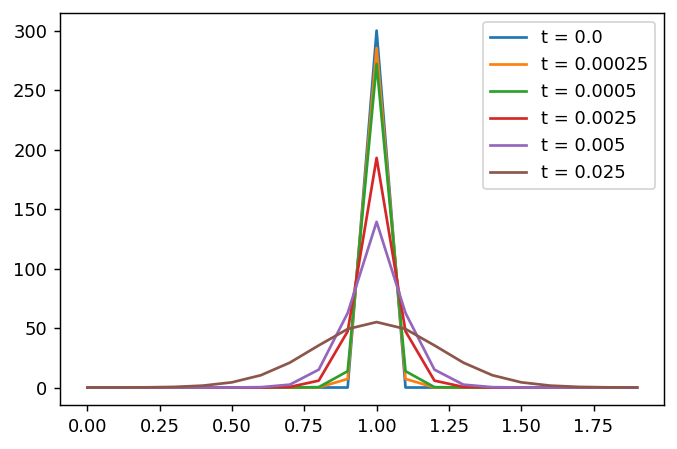

In [5]:
L = 2
# defining the initial conditions
def temp0(i, nL):
    if nL%2: nL -= 1
    if i == nL/2: return 300
    return 0
T = 1
nL = 20
nT = 20000
A = a.heat_equation(temp0, L, T, nL, nT)
# plotting the solution of the heat equation
# time steps
times = [0, 5, 10, 50, 100, 500]
xs = [i*L/nL for i in range(nL)]
plt.figure(dpi=130)
for time in times:
    plt.plot(xs, A[time], label=f"t = {time*T/nT}")
plt.legend()

# 2. Solve heat equation by shooting method

The temperature is 100 deg C at x = 4.5


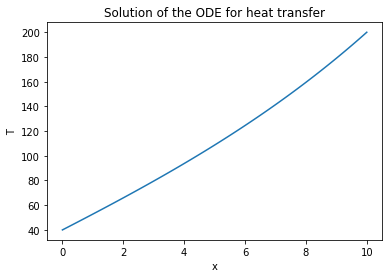

In [6]:
# defining the double derivative of T with respect to x
def d2Tdx2(x, T, z):
    return -0.01*(20-T)
# defining the single derivative of T with respect to x
def dTdx(x, T, z):
    return z
# initial conditions
xi = 0
Ti = 40
xf = 10
Tf = 200
h = 0.1
tol = 1e-3
# calling the function from library
x, T = a.shoot(d2Tdx2, dTdx, xi, Ti, xf, Tf, 10, 400, h, tol)
for i in range(len(T)):
    if T[i] >= 100:
        dest = i
        break
# output of the function 
print("The temperature is 100 deg C at x =", x[dest])
# plotting the solution of the PDE
plt.plot(x, T)
plt.title("Solution of the ODE for heat transfer")
plt.xlabel("x")
plt.ylabel("T")
plt.show()
